This work uses dataset from https://snap.stanford.edu/data/ego-Facebook.html

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

`nodeId.edges` : The edges in the ego network for the node 'nodeId'. Edges are undirected for facebook, and directed (a follows b) for twitter and gplus. The 'ego' node does not appear, but it is assumed that they follow every node id that appears in this file.

`nodeId.circles` : The set of circles for the ego node. Each line contains one circle, consisting of a series of node ids. The first entry in each line is the name of the circle.

In [ ]:
def load_ego_network(ego_id="107"):
    """Load the ego network data files."""
    # Load edges
    edges = pd.read_csv(f"sample_data/{ego_id}.edges", sep=" ", header=None, names=["node1", "node2"])

    # Load circles (communities)
    circles = {}
    try:
        with open(f"sample_data/{ego_id}.circles", 'r') as f:
            for line in f:
                data = line.strip().split()
                circle_name = data[0]
                members = [int(x) for x in data[1:]]
                circles[circle_name] = members
    except FileNotFoundError:
        print("Circles file not found")

    return edges, circles

  # Load and process the data
edges, circles = load_ego_network()

In [ ]:
edges

,node1,node2
0,953,1323
1,1789,1707
2,1175,1059
3,1329,1559
4,1804,1898
...,...,...
53493,1663,946
53494,171,58
53495,1523,1520
53496,993,1609


In [ ]:
"""Create a NetworkX graph from the edge list."""
G = nx.Graph()

# Add edges
edge_list = edges[["node1", "node2"]].values.tolist()
G.add_edges_from(edge_list)

ego_id = "107"
all_nodes = set(edges["node1"].unique()).union(set(edges["node2"].unique()))
ego_edges = [(int(ego_id), node) for node in all_nodes]
G.add_edges_from(ego_edges)


In [ ]:
print("\nNetwork Statistics:")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Average clustering coefficient: {nx.average_clustering(G):.3f}")
print(f"Number of circles: {len(circles)}")
print(f"Radius: {nx.radius(G)}")
print(f"Diameter: {nx.diameter(G)}")


Network Statistics:
Number of nodes: 1035
Number of edges: 27783
Average clustering coefficient: 0.582
Number of circles: 9
Radius: 1
Diameter: 2


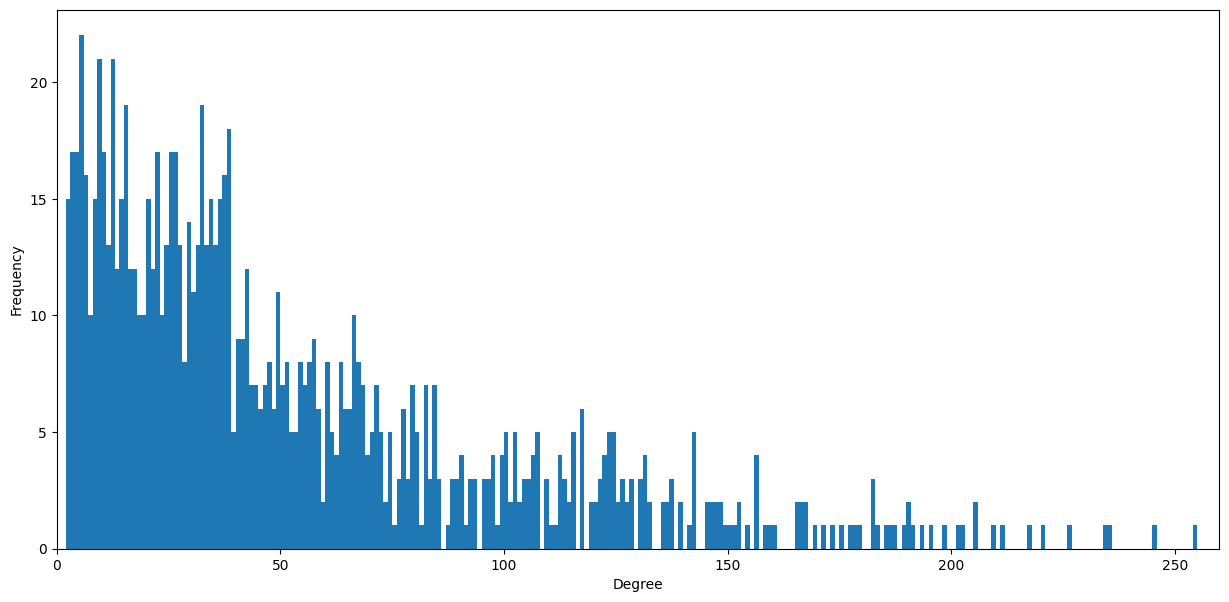

In [ ]:
degree_sequence = [d for n, d in G.degree()]

fig, ax = plt.subplots(figsize=(15, 7))
ax.hist(degree_sequence, bins=range(min(degree_sequence), max(degree_sequence)+2))
ax.set_xlabel("Degree")
ax.set_xlim([0, 260])
ax.set_ylabel("Frequency")
plt.show()

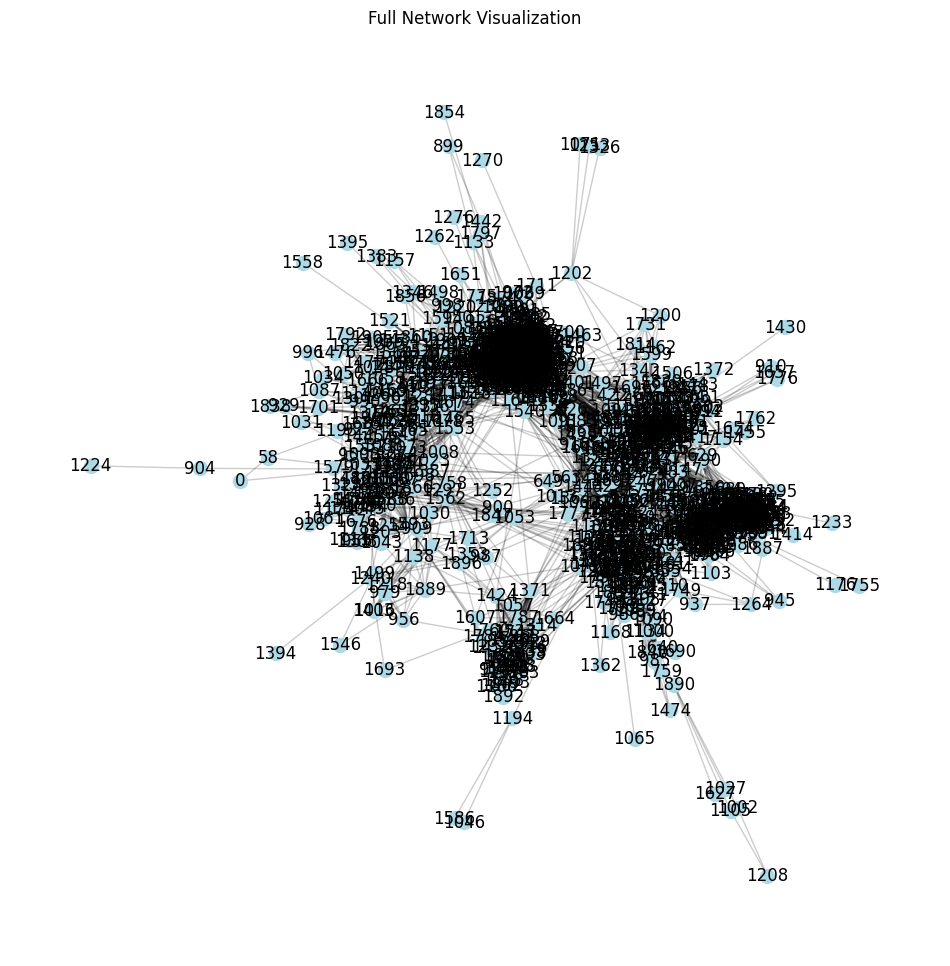

In [ ]:
# Visualize the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=100)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
plt.title("Full Network Visualization")
plt.axis('off')
plt.show()

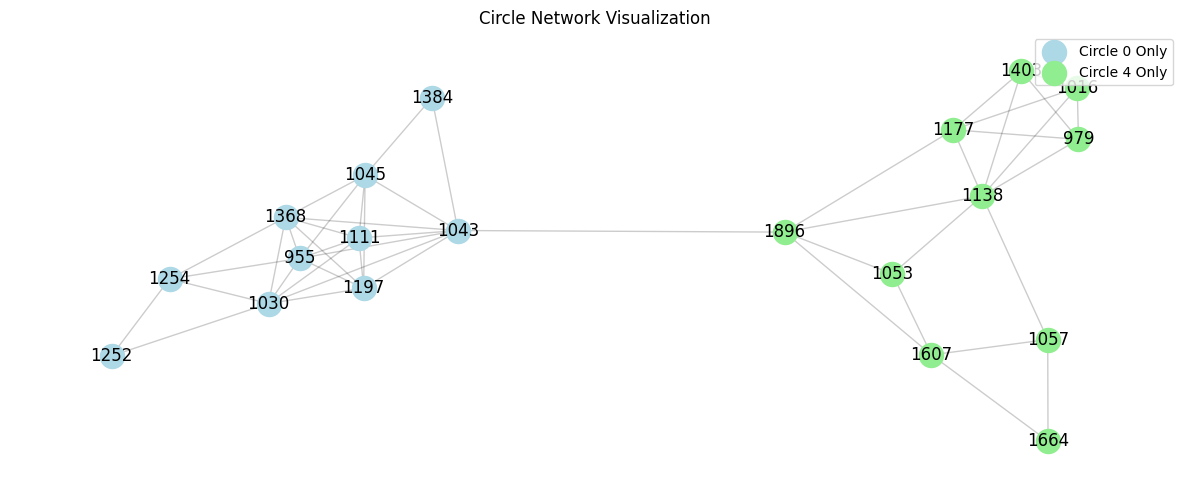

In [ ]:
def visualize_combined_circles(circle1_nodes, circle2_nodes, edges):
    """
    Visualize two circles in a single graph with highlighted common nodes.

    Args:
        circle1_nodes (set): Set of nodes in the first circle
        circle2_nodes (set): Set of nodes in the second circle
        edges (DataFrame): DataFrame containing edge information with 'node1' and 'node2' columns
    """
    # Create full graph
    G = nx.Graph()

    # Combine all nodes
    all_nodes = circle1_nodes.union(circle2_nodes)
    common_nodes = circle1_nodes.intersection(circle2_nodes)

    # Add nodes
    G.add_nodes_from(all_nodes)

    # Add edges
    edge_list = edges[["node1", "node2"]].values.tolist()
    for node1, node2 in edge_list:
        if node1 in all_nodes and node2 in all_nodes:
            G.add_edge(node1, node2)

    # Create the plot
    plt.figure(figsize=(12, 5))

    # Use spring layout with adjusted parameters for better visualization
    pos = nx.spring_layout(G, k=1/np.sqrt(len(G.nodes())), iterations=100)

    # Draw edges
    nx.draw_networkx_edges(G, pos, alpha=0.2)

    # Draw nodes with different colors for different sets
    # Nodes only in circle1
    circle1_only = circle1_nodes - circle2_nodes
    nx.draw_networkx_nodes(G, pos,
                          nodelist=list(circle1_only),
                          node_color='lightblue',
                          node_size=300,
                          label='Circle 0 Only')

    # Nodes only in circle2
    circle2_only = circle2_nodes - circle1_nodes
    nx.draw_networkx_nodes(G, pos,
                          nodelist=list(circle2_only),
                          node_color='lightgreen',
                          node_size=300,
                          label='Circle 4 Only')

    # Common nodes
    nx.draw_networkx_nodes(G, pos,
                          nodelist=list(common_nodes),
                          node_color='red',
                          node_size=300,
                          label='Common Nodes')

    # Add labels
    nx.draw_networkx_labels(G, pos)

    plt.title("Circle Network Visualization")
    plt.legend()
    plt.axis('off')
    plt.tight_layout()

    return plt.gca()

# Usage
ax = visualize_combined_circles(
    set(circles["circle0"]),
    set(circles["circle4"]),
    edges
)
plt.show()

In [ ]:
# calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f"Average clustering coefficient: {clustering_coefficient:.3f}")
# calculate centrality
centrality = dict(nx.degree_centrality(G))
# sort by value
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print(f"Sorted centrality: {sorted_centrality}")

Average clustering coefficient: 0.582
Sorted centrality: [(107, 1.0), (1888, 0.24564796905222439), (1800, 0.23694390715667313), (1663, 0.22727272727272727), (1352, 0.2263056092843327), (1730, 0.218568665377176), (1431, 0.2127659574468085), (1199, 0.20986460348162475), (1584, 0.20406189555125726), (1768, 0.2021276595744681), (1086, 0.19825918762088976), (1589, 0.19825918762088976), (1746, 0.195357833655706), (1827, 0.19439071566731142), (1126, 0.19148936170212766), (1804, 0.1885880077369439), (1390, 0.18665377176015474), (1833, 0.18471953578336558), (1612, 0.18375241779497098), (1377, 0.18375241779497098), (1621, 0.1827852998065764), (1714, 0.18085106382978725), (1559, 0.17988394584139264), (1707, 0.17891682785299806), (1078, 0.1769825918762089), (1835, 0.17601547388781433), (1613, 0.17601547388781433), (1376, 0.17601547388781433), (1610, 0.17311411992263057), (1399, 0.172147001934236), (1622, 0.17117988394584138), (1391, 0.16924564796905223), (1211, 0.16731141199226307), (1551, 0.16537

In [ ]:
# calculate for each circle
centers = []
clustering = []
for circle, members in circles.items():
    subgraph = G.subgraph(members)
    circle_clustering = nx.average_clustering(subgraph)
    centrality = nx.degree_centrality(subgraph)
    c = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[0]
    centers.append(c[0])
    clustering.append(circle_clustering)
    print(f"Circle {circle}: Clustering coefficient = {circle_clustering:.3f} Centrality = {c}")

Circle circle0: Clustering coefficient = 0.812 Centrality = (1030, 0.7777777777777777)
Circle circle1: Clustering coefficient = 0.539 Centrality = (1410, 0.4666666666666667)
Circle circle2: Clustering coefficient = 0.335 Centrality = (913, 0.38888888888888884)
Circle circle3: Clustering coefficient = 0.515 Centrality = (1574, 0.6578947368421052)
Circle circle4: Clustering coefficient = 0.691 Centrality = (1138, 0.7777777777777777)
Circle circle5: Clustering coefficient = 0.468 Centrality = (1591, 0.5833333333333333)
Circle circle6: Clustering coefficient = 0.530 Centrality = (1800, 0.5588235294117647)
Circle circle7: Clustering coefficient = 0.246 Centrality = (968, 0.19230769230769232)
Circle circle8: Clustering coefficient = 0.846 Centrality = (1837, 0.9705882352941176)


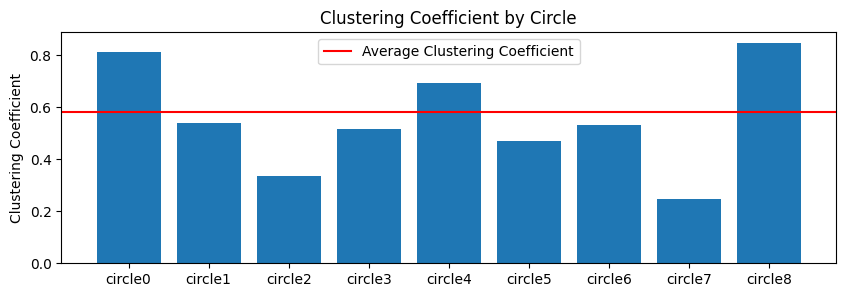

In [ ]:
# Show barchart of clustering centrality
plt.figure(figsize=(10, 3))
plt.bar(range(len(clustering)), clustering)
plt.xticks(range(len(clustering)), circles.keys())
plt.ylabel("Clustering Coefficient")
plt.title("Clustering Coefficient by Circle")

#add a line for the average clustering coefficient
plt.axhline(y=clustering_coefficient, color='r', linestyle='-', label="Average Clustering Coefficient")

plt.legend()

plt.show()

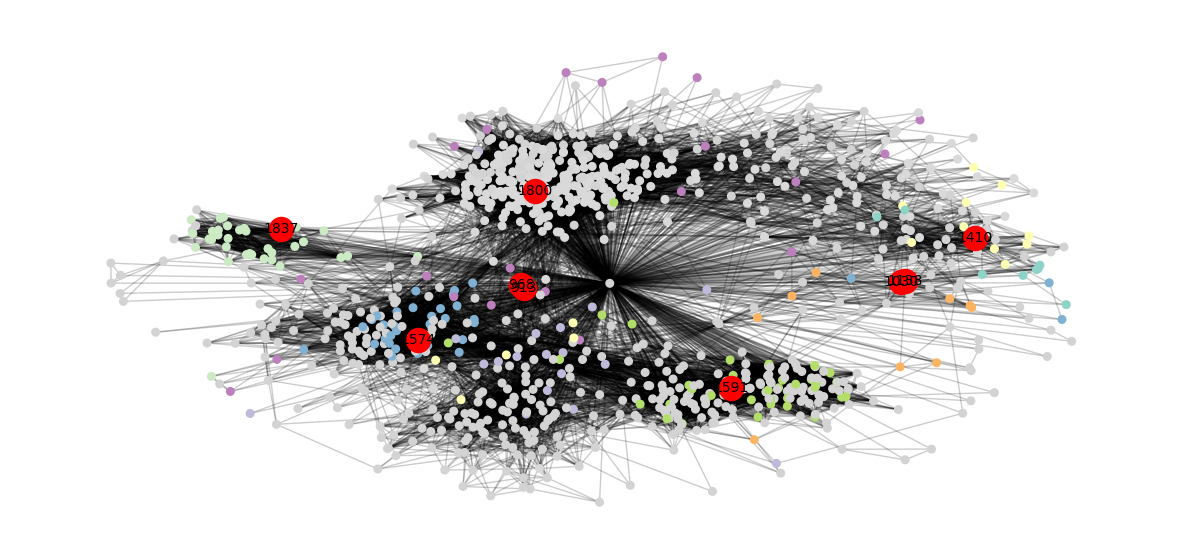

In [ ]:
def visualize_centers(G, centers):
    fig, ax1 = plt.subplots(figsize=(15, 7))
    # layout to maximize circle visibility
    pos = nx.spring_layout(G, scale=50)

    # Draw nodes colored by their first circle membership
    node_colors = []
    for node in G.nodes():
        color = 'lightgrey'  # Default color
        for i, (_, members) in enumerate(circles.items()):
            if node in members:
                color = plt.cm.Set3(i / len(circles))
                break
        node_colors.append(color)

    nx.draw_networkx_nodes(G, pos,
                          node_size=30,
                          node_color=node_colors,
                          ax=ax1)

    # node color for centers

    nx.draw_networkx_nodes(G, pos,
                          nodelist=centers,
                          node_size=300,
                          node_color="red",
                          ax=ax1)

     # add labels only on centers
    labels = {node: node for node in centers}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, ax=ax1)
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax1)
    ax1.set_axis_off()
    plt.show()

visualize_centers(G, centers)


Degree Centrality. For a node v in graph G, the degree centrality is calculated as:

$$
C_D(v) = \frac{deg(v)}{n-1}
$$

Where:
- $deg(v)$ is the degree (number of connections) of node v
- $n$ is the total number of nodes in the graph
- $n-1$ is used for normalization (maximum possible degree)

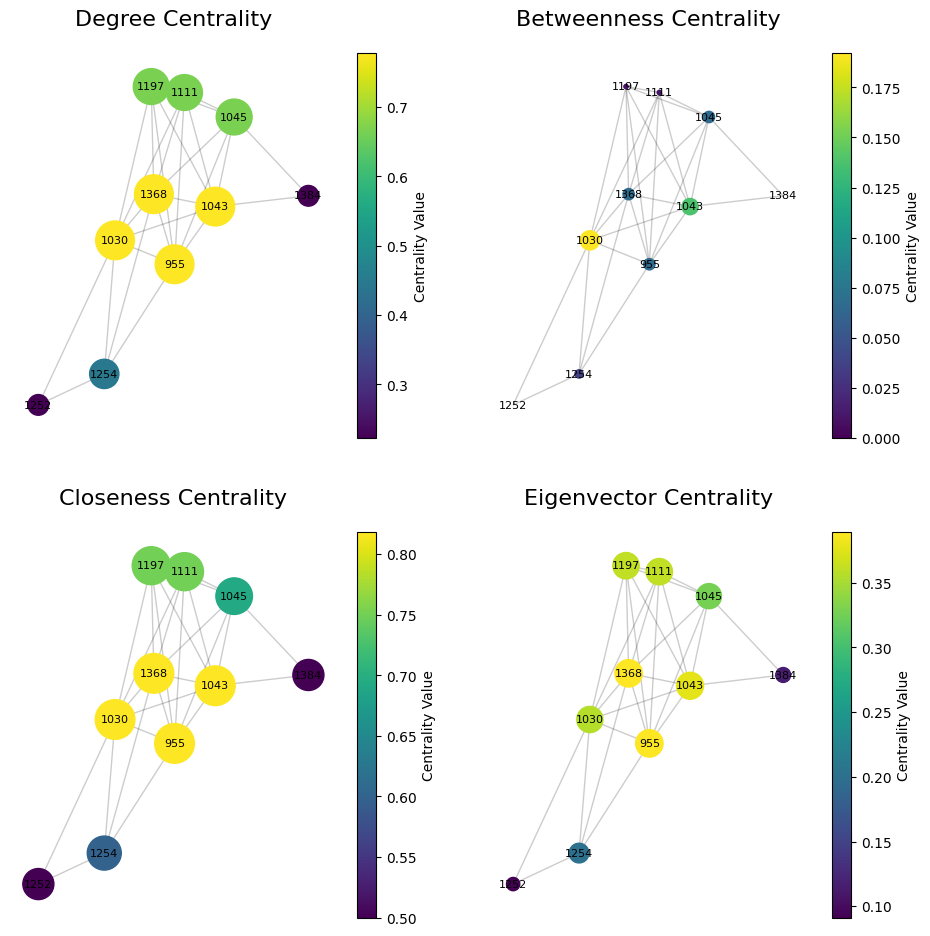

In [ ]:

G0 = nx.Graph()

G0.add_nodes_from(circles["circle0"])
edge_list = edges[["node1", "node2"]].values.tolist()
for node1, node2 in edge_list:
    if node1 in G0.nodes() and node2 in G0.nodes():
        G0.add_edge(node1, node2)

degree_cent = nx.degree_centrality(G0)
between_cent = nx.betweenness_centrality(G0)
close_cent = nx.closeness_centrality(G0)
eigen_cent = nx.eigenvector_centrality(G0)

# Create a figure with subplots for each centrality measure
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
pos = nx.spring_layout(G0, k=1, iterations=50)  # k=1 for more spread

# Helper function for drawing each centrality measure
def draw_centrality(G, centrality, ax, title):
    # Node sizes based on centrality
    node_sizes = [centrality[node] * 1000 for node in G.nodes()]

    # Node colors based on centrality value
    node_colors = list(centrality.values())

    # Draw the network
    nx.draw_networkx_edges(G, pos, alpha=0.2, ax=ax)
    nodes = nx.draw_networkx_nodes(G, pos,
                                 node_size=node_sizes,
                                 node_color=node_colors,
                                 cmap=plt.cm.viridis,
                                 ax=ax)

    # Add labels
    nx.draw_networkx_labels(G, pos, font_size=8, ax=ax)

    # Add colorbar
    plt.colorbar(nodes, ax=ax, label='Centrality Value')

    ax.set_title(title, fontsize=16, pad=20)
    ax.axis('off')

# Draw each centrality measure
draw_centrality(G0, degree_cent, axes[0,0], 'Degree Centrality')
draw_centrality(G0, between_cent, axes[0,1], 'Betweenness Centrality')
draw_centrality(G0, close_cent, axes[1,0], 'Closeness Centrality')
draw_centrality(G0, eigen_cent, axes[1,1], 'Eigenvector Centrality')

plt.tight_layout(pad=3.0)
plt.show()

In [ ]:
# Print top 5 nodes for each centrality measure
for name, cent in [('Degree', degree_cent),
                  ('Betweenness', between_cent),
                  ('Closeness', close_cent),
                  ('Eigenvector', eigen_cent)]:
    print(f"\nTop 5 nodes by {name} Centrality in Circle0:")
    top_nodes = dict(sorted(cent.items(), key=lambda x: x[1], reverse=True)[:5])
    for node, value in top_nodes.items():
        print(f"{node}: {value:.3f}")


Top 5 nodes by Degree Centrality:
1043: 0.778
1030: 0.778
1368: 0.778
955: 0.778
1045: 0.667

Top 5 nodes by Betweenness Centrality:
1030: 0.192
1043: 0.137
1045: 0.067
1368: 0.066
955: 0.066

Top 5 nodes by Closeness Centrality:
1043: 0.818
1030: 0.818
1368: 0.818
955: 0.818
1197: 0.750

Top 5 nodes by Eigenvector Centrality:
955: 0.389
1368: 0.389
1043: 0.377
1197: 0.361
1111: 0.361
